# 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import os

# 시각화 오류 방지 (라이브러리 충돌)
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

foreign_travel_df = pd.read_csv('./data/외래관광객조사_2023_데이터.txt', delimiter = '\t', encoding='cp949', low_memory=False)

display(foreign_travel_df.head(10))
print(foreign_travel_df.shape) # row: 16196, col: 365

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.838755
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.272342
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.434506
5,12.0,1.0,1.0,NaN,1,1,8.0,7.0,NaN,NaN,...,5,1.0,1.0,5.0,2.0,4.0,1.0,1.0,1.0,298.390736
6,14.0,1.0,1.0,NaN,1,1,4.0,5.0,8.0,1.0,...,5,1.0,1.0,8.0,2.0,3.0,1.0,1.0,1.0,130.457228
7,16.0,3.0,3.0,5.0,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,2.0,3.0,3.0,1.0,282.046513
8,19.0,1.0,1.0,NaN,1,1,1.0,8.0,NaN,NaN,...,5,1.0,1.0,8.0,1.0,5.0,1.0,1.0,1.0,119.056178
9,20.0,1.0,1.0,NaN,1,1,7.0,1.0,9.0,1.0,...,4,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,636.214288


(16196, 365)


In [2]:
# 항목 별 값 조회
columns_value_df= pd.read_excel('./data/외래관광객조사_2023_항목정의서.xlsx', sheet_name=1)
# display(columns_value_df.head(5))

indices = columns_value_df[columns_value_df['항목ID'].notnull()].index.tolist()

# 구간 별 동일값 설정
for i in range(len(indices)):
    # index 설정
    start_idx = indices[i]
    end_idx = indices[i + 1] if i + 1 < len(indices) else len(columns_value_df)
    
    # 각 구간에 동일한 값 설정
    columns_value_df.loc[start_idx:end_idx-1, '항목ID'] = columns_value_df.loc[start_idx, '항목ID']
    columns_value_df.loc[start_idx:end_idx-1, '항목명'] = columns_value_df.loc[start_idx, '항목명']
    columns_value_df.loc[start_idx:end_idx-1, '변수명'] = columns_value_df.loc[start_idx, '변수명']

display(columns_value_df)

,항목ID,항목명,변수명,코드값,코드명,비고
0,3.0,한국 방문횟수(카테고리),RVIT,1,1회,NaN
1,3.0,한국 방문횟수(카테고리),RVIT,2,2회,NaN
2,3.0,한국 방문횟수(카테고리),RVIT,3,3회,NaN
3,3.0,한국 방문횟수(카테고리),RVIT,4,4회 이상,NaN
4,3.0,한국 방문횟수(카테고리),RVIT,5,재방문,NaN
...,...,...,...,...,...,...
6384,363.0,방한횟수별,D_NUM,3,3회,NaN
6385,363.0,방한횟수별,D_NUM,4,4회 이상,NaN
6386,364.0,여행형태별,D_GUB,1,개별여행,분석변수
6387,364.0,여행형태별,D_GUB,2,AIR-TEL,NaN


In [3]:
# 결측치 체크 (숫자형 데이터)

# 항목 정보 가져오기
# columns_info_df= pd.read_excel('./data/외래관광객조사_2023_항목정의서.xlsx')
# number_type_cols = columns_info_df.loc[columns_info_df['데이터타입'] == '코드형', ['항목명', '변수명']]
# display(number_type_cols.head(3))

# missing_counts = japanese_df.isnull().sum(axis=0)
# missing_cols = missing_counts[missing_counts > 0]

# # missing_cols에 실제로 존재하는 컬럼만 필터링
# existing_columns = [col for col in number_type_cols['변수명'].tolist() if col in missing_cols]

# # 숫자형 컬럼의 결측치 값만 가져오기
# missing_num_cols = missing_cols[existing_columns]

# # 결측치 비율 조회
# missing_percentage = (missing_num_cols / len(japanese_df)) * 100
# print(missing_percentage)

# 설문조사 데이터로 결측치를 하나의 값, 범주로 보고 처리 진행하는 것이 나을 것으로 확인됨
# because. 무응답, 해당없음 값에 NaN이 많이 확인되기 때문
# 숫자형 필드들이므로 -1로 설정

foreign_travel_df.fillna(-1, inplace=True)

In [46]:
# 일본 방한 여행객 데이터
japanese_df = foreign_travel_df[foreign_travel_df['D_NAT'] == 2]
japanese_df.info()
print(japanese_df.shape) # row: 1444, col: 365

pd.set_option('display.max_columns', 274)  # 모든 열을 출력하도록 설정
pd.set_option("display.max_rows", 274)

display(japanese_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Index: 1963 entries, 25 to 16169
Columns: 365 entries, pnid to weight
dtypes: float64(347), int64(17), object(1)
memory usage: 5.5+ MB
(1963, 365)


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q5,Q5_1a01,Q5_1a02,Q5_1a03,Q5_1a04,Q5_1a05,Q5_1a06,Q5_1a07,Q5_1a08,Q5_1a09,Q5_1a10,Q5_1a99,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,MQ7_1,MQ7_1제외,MQ7_2,MQ7_1$15제외,MQ7_1제외$15제외,RQ7_1,RQ7_1제외,RQ7_2,RQ7_1$15제외,RQ7_1제외$15제외,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,KWON1,KWON2,KWON3,KWON4,KWON5,KWON6,KWON7,KWON8,KWONA1,KWONA2,KWONA3,KWONB1,KWONB2,M박HAP,M일HAP,M일HAP_61,R1일HAP,서울박TOT,경기박TOT,인천박TOT,강원박TOT,대전박TOT,충북박TOT,충남박TOT,세종박TOT,경북박TOT,경남박TOT,대구박TOT,울산박TOT,...,MDAY전체TOT_RAW61,MDAY전체_개별국제교통비제외,MDAY전체TOT_RAW61항공제외2,RDAY전체,RDAY전체TOT_RAW2,RDAY전체TOT_RAW61,RDAY전체_개별국제교통비제외,RDAY전체TOT_RAW61항공제외2,MDAY개별대체,MDAY에어대체,MDAY단체대체,MDAY개별61대체,MDAY에어61대체,MDAY단체61대체,MDAY개별61항공제외대체,MDAY에어61항공제외대체,MDAY단체61항공제외대체,RDAY개별대체,RDAY에어대체,RDAY단체대체,RDAY개별61대체,RDAY에어61대체,RDAY단체61대체,RDAY개별61항공제외대체,RDAY에어61항공제외대체,RDAY단체61항공제외대체,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,C여행사1인대체,C가이드1인대체,C숙박비1인대체,C음식점1인대체,C식음료1인대체,C국제한국1인대체,C국제국외1인대체,C국제수상1인대체,C한국한국1인대체,C한국국외1인대체,C한국수상1인대체,C한국철도1인대체,C한국도로1인대체,C대여서1인대체,C유류비1인대체,C문화서1인대체,C오락및1인대체,C쇼핑비1인대체,C데이터1인대체,C치료및1인대체,C미용서1인대체,C기타비1인대체,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q12a16,Q12a17,Q12a18,Q12a19,Q12a20,Q12a21,Q12a22,Q12a23,Q12a24,Q12a25,Q12a26,Q13,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
25,40.0,2.0,2.0,5.0,1,1,5.0,-1.0,-1.0,6.0,-1.0,-1.0,-1.0,11.0,-1.0,-1.0,11.0,-1.0,-1.0,12.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,3.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11,-1.0,-1.0,11102.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,3.0,4.0,4.0,2.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,155.8,79.80,79.80,3.0,3.0,3.0,2.0,2.0,155.8,-1.0,-1.0,155.8,-1.0,-1.0,79.80,-1.0,-1.0,3.0,-1.0,-1.0,3.0,-1.0,-1.0,2.0,-1.0,-1.0,0.0,0.0,91.2,114.0,0.0,0.0,304.0,0.0,0.0,0.0,0.0,22.8,15.2,0.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,4,5,5,5,5,5,5,5,5,5,-1.0,5,5,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,479.315147
35,69.0,20.0,4.0,5.0,1,1,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,15.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,7.0,6.0,3.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,5,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,2.0,-1.0,11504.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1

In [50]:
# 시각화 처리를 위한 값 대체

mapping_dict = {col: columns_value_df[columns_value_df['변수명'] == col].set_index('코드값')['코드명'].to_dict()
                for col in columns_value_df['변수명'].unique()}

# 매핑 딕셔너리를 사용해 각 열에 대해 매핑 적용
for col, mapping in mapping_dict.items():
    if col in japanese_df.columns:
        japanese_df.loc[:, col] = japanese_df[col].map(mapping).fillna(japanese_df[col])

C:\Users\eighttwofive\AppData\Local\Temp\ipykernel_12956\3746725139.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  japanese_df.loc[:, col] = japanese_df[col].map(mapping).fillna(japanese_df[col])


# 데이터 분석 및 시각화

In [53]:
# 방한하는 나이, 성별, 연령대 분석

info_df = japanese_df[['D_SEX',  # 성별
                      'D_AGE',  # 나이
                      'D_MOK',  # 방한목적별
                      'D_NUM',  # 방한횟수별
                      'Q1_1a1', # 한국여행 관심 계기 1순위
                      'Q2a1',   # 방문을 고려한 아시아 국가 1순위
                      'Q2_1a1', # 해당국가 관심 계기 1순위
                      'Q3_1a1', # 고려한 관광활동 1순위
                      'Q3_2a1', # 고려한 관광인프라 1순위
                      'Q4a1',   # 여행전 한국관련 정보 수집 경로 1순위
                      'Q4_1a1', # 주로 이용한 사이트 1순위
                      'Q4_2a1', # 부족했던 정보 1순위
                      'Q5',     # 왕복 항공권 및 여행상품 예약시기
                      'Q7A',    # 동반자 유무
                      'Q8a01',  # 참여한 활동
                      'Q8_1a1', # 만족한 활동
                      'Q9_1_1', # 가장 좋았던 곳
                      'KWON1',  # 방문권역1
                      'KWON2',  # 방문권역2
                      'KWON3',  # 방문권역3
                      'KWONA1', # 수도권 및 지방 방문율(수도권 한정)
                      'KWONB1', # 수도권 및 지방 방문율(수도권 방문)
                      'M박HAP', # 총 숙박기간
                      'M일HAP', # 총 체재기간
                      'Q9_5A1', # 주요 이용 숙박시설
                      'Q10_2a01',    # 쇼핑 항목 1순위
                      'Q10_2a02',    # 쇼핑 항목 2순위
                      'Q10_2a03',    # 쇼핑 항목 3순위
                      'Q10_3a1',     # 쇼핑 장소 1순위
                      'Q10_3a2',     # 쇼핑 장소 2순위
                      'Q10_3a3',     # 쇼핑 장소 3순위
                      'Q11',         # 전반적 만족도
                      'Q12a01',      # 항목별 만족도 (식도락(음식))
                      'Q12a02',      # 항목별 만족도 (쇼핑)
                      'Q12a03',      # 항목별 만족도 (자연경관 감상)
                      'Q12a04',      # 항목별 만족도 (고궁/역사 유적지 방문)
                      'Q12a05',      # 항목별 만족도 (전통문화체험)
                      'Q12a06',      # 항목별 만족도 (박물관, 전시관 관람)
                      'Q12a07',      # 항목별 만족도 (K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문)
                      'Q12a08',      # 항목별 만족도 (연극, 뮤지컬, 발레 등 공연 관람)
                      'Q12a09',      # 항목별 만족도 (지역 축제 참여)
                      'Q12a10',      # 항목별 만족도 (유흥(나이트라이프 활동 및 카지노등))
                      'Q12a11',      # 항목별 만족도 (오락(놀이공원 및 테마파크 방문 등))
                      'Q12a12',      # 항목별 만족도 (뷰티/미용 관광(마사지샵, 헤어샵, 네일케어등 방문))
                      'Q12a13',      # 항목별 만족도 (치료/건강검진 (피부과, 성형외과, 내/외과 입원, 수술 등))
                      'Q12a14',      # 항목별 만족도 (스포츠/레포츠 관람 (야구, 축구, 농구 등))
                      'Q12a15',      # 항목별 만족도 (스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등))
                      'Q13',         # 재방문 의사
                      'Q14'          # 타인 추천 의향
]]

display(info_df.head(3))

,D_SEX,D_AGE,D_MOK,D_NUM,Q1_1a1,Q2a1,Q2_1a1,Q3_1a1,Q3_2a1,Q4a1,Q4_1a1,Q4_2a1,Q5,Q7A,Q8a01,Q8_1a1,Q9_1_1,KWON1,KWON2,KWON3,KWONA1,KWONB1,M박HAP,M일HAP,Q9_5A1,Q10_2a01,Q10_2a02,Q10_2a03,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q13,Q14
25,남성,20대,여가/위락/휴식,2회,이동거리/비행시간이 적합해서,태국,기타,오락(놀이공원 및 테마파크 방문 등,기타,인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 1~2주 전,동반자 있음,-1.0,오락(놀이공원 및 테마파크 방문 등),서울특별시-파라다이스워커힐 카지노,서울,-1.0,-1.0,수도권 한정,수도권 방문율,3.0,4.0,호텔,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 만족,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다
35,남성,50대,여가/위락/휴식,4회 이상,계획한 여행 경비에 적합한 여행지여서,-1.0,-1.0,식도락(음식/미식) 관광,"의료체계/질병관리(전염병, 방역관리 등)",인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 2~3개월 전,동반자 없음,식도락(음식/미식) 관광,식도락(음식/미식) 관광,서울특별시-마포구,서울,-1.0,-1.0,수도권 한정,수도권 방문율,3.0,4.0,호텔,-1.0,"식료품(김치, 김, 과자 등)",의류,백화점,로드샵,-1.0,매우 만족,매우 만족,매우 만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다
55,여성,30대,여가/위락/휴식,4회 이상,이동거리/비행시간이 적합해서,-1.0,-1.0,식도락(음식/미식) 관광,경제적인 여행 경비,인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 1~2개월 전,동반자 있음,식도락(음식/미식) 관광,쇼핑,서울특별시-인사동,서울,-1.0,-1.0,수도권 한정,수도권 방문율,6.0,7.0,호텔,-1.0,"식료품(김치, 김, 과자 등)",-1.0,로드샵,-1.0,-1.0,매우 만족,매우 만족,만족,-1.0,만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,대체로 그렇다,대체로 그렇다


## 한국어 폰트 세팅

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 한국어 폰트 설정
font_path = "C:\\Users\\eighttwofive\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"  # 폰트 경로

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## 관심 계기

In [54]:
print(info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].shape)

(1625, 1)


<Axes: xlabel='[연령별]', ylabel='[명]'>

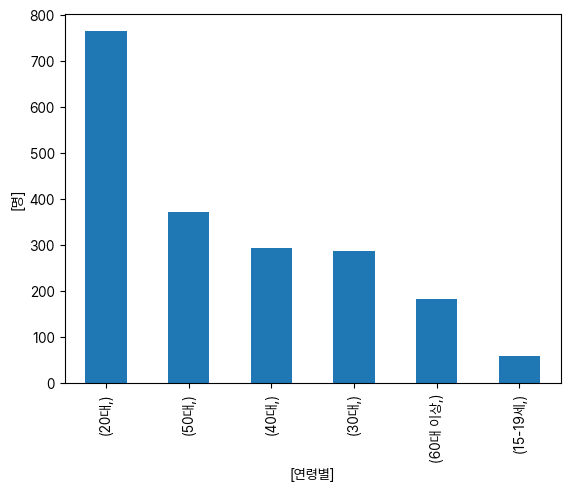

In [55]:
# 나이
info_df.loc[info_df['D_AGE'] != -1, ['D_AGE']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'D_AGE', '항목명'].head(1).values
)

<Axes: xlabel='[성별]', ylabel='[명]'>

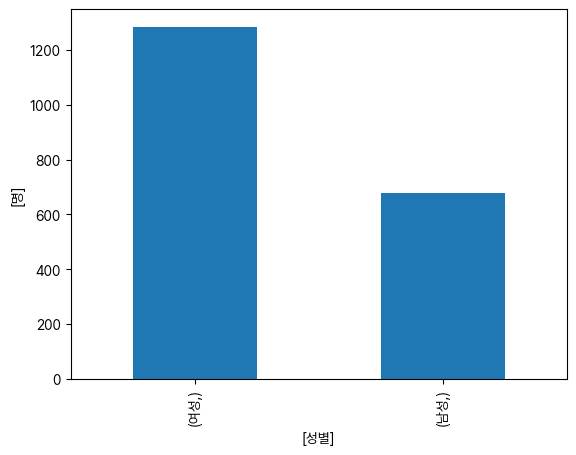

In [56]:
# 성별
info_df.loc[info_df['D_SEX'] != -1, ['D_SEX']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'D_SEX', '항목명'].head(1).values
)

<Axes: xlabel='[방한목적별]', ylabel='[명]'>

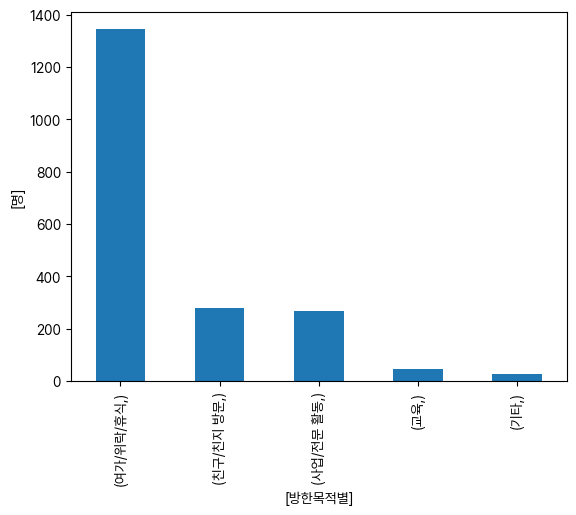

In [57]:
# 방한목적별
info_df.loc[info_df['D_MOK'] != -1, ['D_MOK']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'D_MOK', '항목명'].head(1).values
)

<Axes: xlabel='[방한횟수별]', ylabel='[명]'>

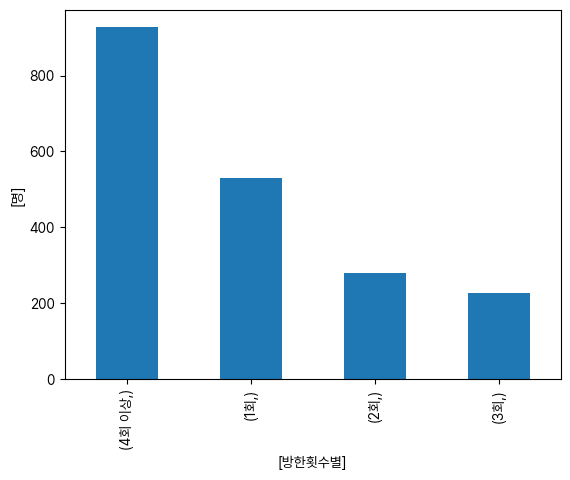

In [58]:
# 방한횟수별
info_df.loc[info_df['D_NUM'] != -1, ['D_NUM']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'D_NUM', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_1순위]', ylabel='[명]'>

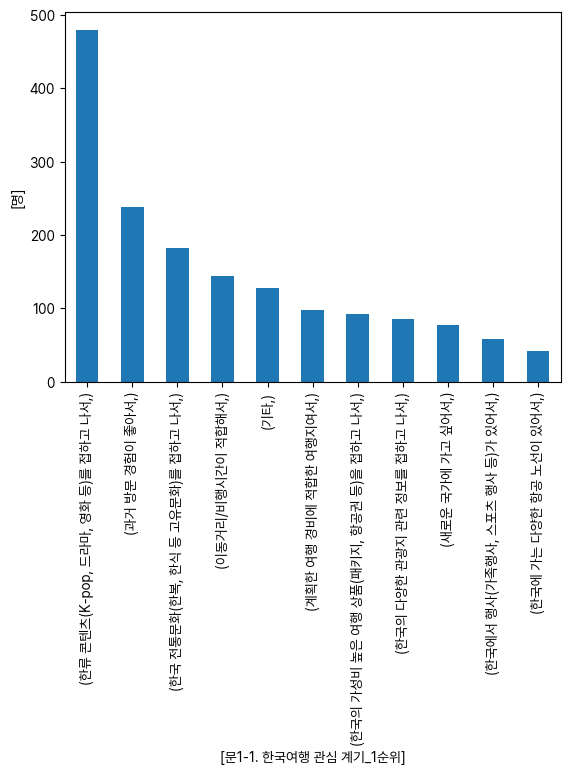

In [59]:
# 관심 계기 1순위 시각화
info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values
)

시각화 해서 봤을 경우 (무응답 제외, 1순위만 체크)

+ 일본 관광객 성비는 여성이 압도적으로 많음
+ 방한 목적은 관광(여가/휴식)이 제일 많음
+ 재방문율이 높은 편이며, 첫 방문으로 오는 여행객도 많음

In [60]:
# 만족했던 경험은 무엇인가?
# 가장 만족스러웠던 장소는 어디인가?
# 부족했던 정보나 아쉬웠던 점은 있는가?

# 한국 첫 방문 관광객 정보
first_travel_df = info_df[info_df['D_NUM'] == '1회']

# 한국 재 방문 관광객 정보
re_travel_df = info_df[info_df['D_NUM'] != '1회']

display(first_travel_df.head(3))
display(re_travel_df.head(3))

,D_SEX,D_AGE,D_MOK,D_NUM,Q1_1a1,Q2a1,Q2_1a1,Q3_1a1,Q3_2a1,Q4a1,Q4_1a1,Q4_2a1,Q5,Q7A,Q8a01,Q8_1a1,Q9_1_1,KWON1,KWON2,KWON3,KWONA1,KWONB1,M박HAP,M일HAP,Q9_5A1,Q10_2a01,Q10_2a02,Q10_2a03,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q13,Q14
311,남성,30대,여가/위락/휴식,1회,이동거리/비행시간이 적합해서,싱가포르,새로운 국가에 가고 싶어서,쇼핑,대중교통/교통,인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 2~3개월 전,동반자 없음,식도락(음식/미식) 관광,고궁/역사 유적지 방문,서울특별시-경복궁,서울,-1.0,-1.0,수도권 한정,수도권 방문율,2.0,3.0,호텔,-1.0,"식료품(김치, 김, 과자 등)",-1.0,시내 면세점,대형마트,-1.0,만족,보통,매우 만족,-1.0,매우 만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다
320,남성,20대,사업/전문 활동,1회,-1.0,싱가포르,새로운 국가에 가고 싶어서,-1.0,-1.0,인터넷 사이트/앱,글로벌 포털사이트 (구글 등),"교통정보(이동거리, 동선 등)",출발 1주 이내,동반자 없음,식도락(음식/미식) 관광,식도락(음식/미식) 관광,경기도-김포,-1.0,경기도,-1.0,수도권 한정,수도권 방문율,1.0,2.0,호텔,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 만족,매우 만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다
322,여성,30대,여가/위락/휴식,1회,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",싱가포르,새로운 국가에 가고 싶어서,식도락(음식/미식) 관광,치안,인터넷 사이트/앱,"소셜미디어 (페이스북, 인스타그램, 트위터, 웨이보 등)","교통정보(이동거리, 동선 등)",출발 1~2개월 전,동반자 없음,식도락(음식/미식) 관광,식도락(음식/미식) 관광,서울특별시-명동,서울,-1.0,-1.0,수도권 한정,수도권 방문율,4.0,5.0,호텔,"향수, 화장품","식료품(김치, 김, 과자 등)",-1.0,백화점,대형마트,-1.0,매우 만족,매우 만족,매우 만족,-1.0,매우 만족,-1.0,만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다


,D_SEX,D_AGE,D_MOK,D_NUM,Q1_1a1,Q2a1,Q2_1a1,Q3_1a1,Q3_2a1,Q4a1,Q4_1a1,Q4_2a1,Q5,Q7A,Q8a01,Q8_1a1,Q9_1_1,KWON1,KWON2,KWON3,KWONA1,KWONB1,M박HAP,M일HAP,Q9_5A1,Q10_2a01,Q10_2a02,Q10_2a03,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q13,Q14
25,남성,20대,여가/위락/휴식,2회,이동거리/비행시간이 적합해서,태국,기타,오락(놀이공원 및 테마파크 방문 등,기타,인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 1~2주 전,동반자 있음,-1.0,오락(놀이공원 및 테마파크 방문 등),서울특별시-파라다이스워커힐 카지노,서울,-1.0,-1.0,수도권 한정,수도권 방문율,3.0,4.0,호텔,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 만족,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다
35,남성,50대,여가/위락/휴식,4회 이상,계획한 여행 경비에 적합한 여행지여서,-1.0,-1.0,식도락(음식/미식) 관광,"의료체계/질병관리(전염병, 방역관리 등)",인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 2~3개월 전,동반자 없음,식도락(음식/미식) 관광,식도락(음식/미식) 관광,서울특별시-마포구,서울,-1.0,-1.0,수도권 한정,수도권 방문율,3.0,4.0,호텔,-1.0,"식료품(김치, 김, 과자 등)",의류,백화점,로드샵,-1.0,매우 만족,매우 만족,매우 만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,매우 그렇다,매우 그렇다
55,여성,30대,여가/위락/휴식,4회 이상,이동거리/비행시간이 적합해서,-1.0,-1.0,식도락(음식/미식) 관광,경제적인 여행 경비,인터넷 사이트/앱,글로벌 포털사이트 (구글 등),-1.0,출발 1~2개월 전,동반자 있음,식도락(음식/미식) 관광,쇼핑,서울특별시-인사동,서울,-1.0,-1.0,수도권 한정,수도권 방문율,6.0,7.0,호텔,-1.0,"식료품(김치, 김, 과자 등)",-1.0,로드샵,-1.0,-1.0,매우 만족,매우 만족,만족,-1.0,만족,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,대체로 그렇다,대체로 그렇다


<Axes: xlabel="첫 방한 일본 관광객 ['문1-1. 한국여행 관심 계기_1순위']", ylabel='[명]'>

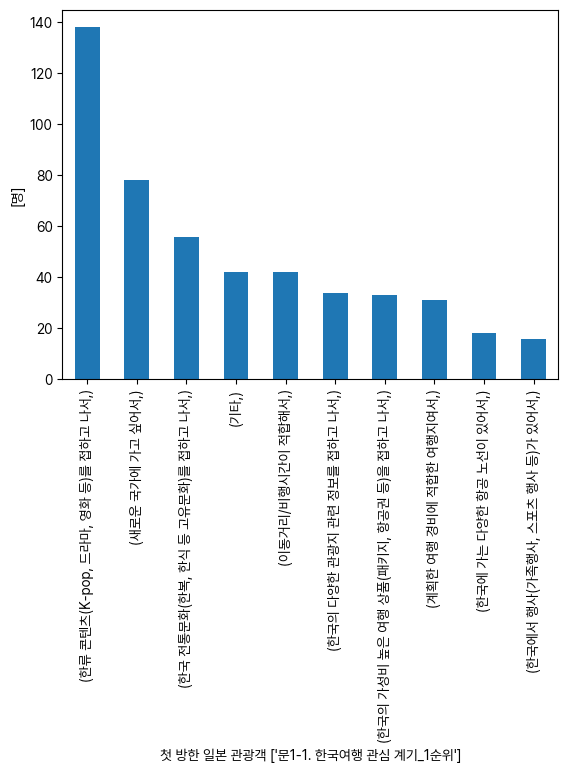

In [94]:
# 첫 방문자들의 방한 관심
first_travel_df.loc[(first_travel_df['D_MOK'] != -1) & (first_travel_df['Q1_1a1'] != -1), ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"첫 방한 일본 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values}"
)


<Axes: xlabel="2회 이상 방한 일본 관광객 ['문1-1. 한국여행 관심 계기_1순위']", ylabel='[명]'>

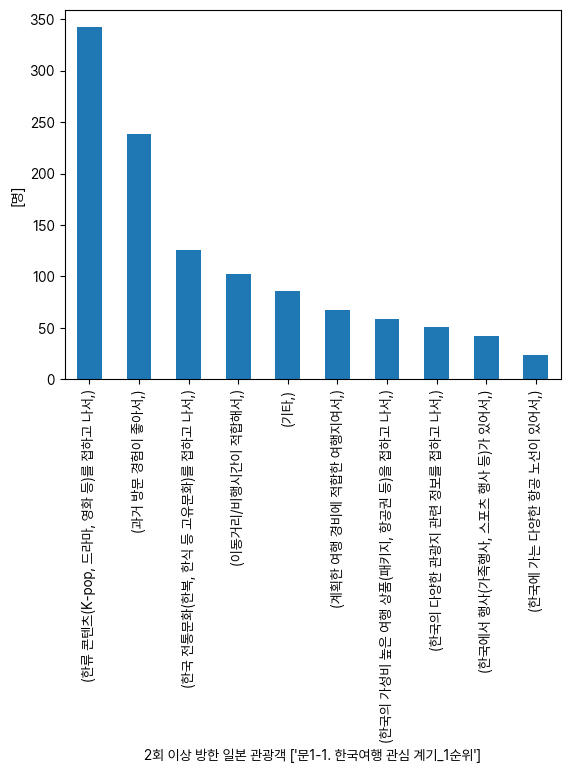

In [95]:
# 재 방문자의 방한 관심
re_travel_df.loc[(re_travel_df['D_MOK'] != -1) & (re_travel_df['Q1_1a1'] != -1), ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"2회 이상 방한 일본 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values}"
)

<Axes: xlabel="첫 방한 일본 관광객 ['성별']", ylabel='[명]'>

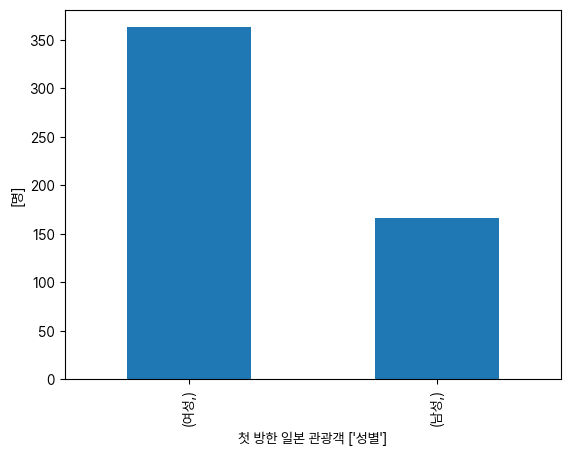

In [79]:
# 첫 방문자들 성비

first_travel_df.loc[first_travel_df['D_SEX'] != -1, ['D_SEX']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"첫 방한 일본 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'D_SEX', '항목명'].head(1).values}"
)

<Axes: xlabel="2회 이상 방한 일본 관광객 ['성별']", ylabel='[명]'>

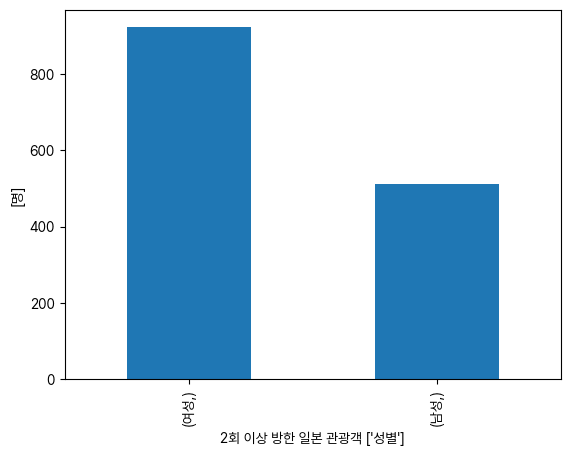

In [77]:
# 재 방문자들의 성비

re_travel_df.loc[re_travel_df['D_SEX'] != -1, ['D_SEX']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"2회 이상 방한 일본 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'D_SEX', '항목명'].head(1).values}"
)

성비는 대체로 2:1로 일정함
재방문률이 첫방문한 사람보다 많으며, 전체적으로 늘어난 상태

1. 첫/재방문 모두 한류 콘텐츠에 많은 관심을 가지고 있음
=> 일본 사람들이 선호하는 한류 콘텐츠에 대한 트렌드 제시 

2. 관광업 산업 발달을 위해서는 고객 유치를 늘려야 함
남성들의 한국 여행에 대한 인식(장단점이) 어떤지 분석해보면 좋을 것 같음!

+ 첫 방문자들이 만족했던 경험과 재방문 관광객의 만족했던 경험을 분석
+ 불만족하거나 부족했던 부분에 대한 분석
+ 위 데이터를 기반으로 하는 트렌드 분석 등을 제시

<Axes: xlabel="방한 일본 남성 관광객 ['문1-1. 한국여행 관심 계기_1순위']", ylabel='[명]'>

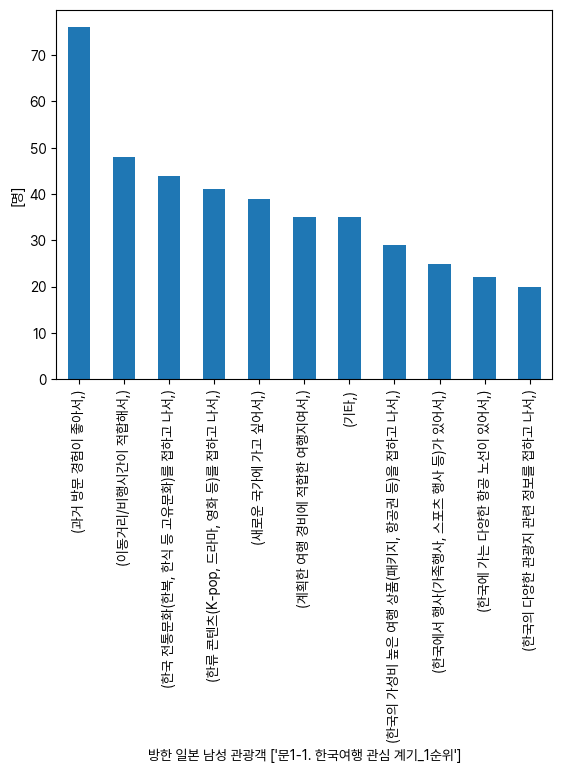

In [93]:
# 일본 남자 방한 데이터 프레임
mans_travel_df = info_df.loc[info_df['D_SEX'] == '남성']

mans_travel_df.loc[(mans_travel_df['D_MOK'] != -1) & (mans_travel_df['Q1_1a1'] != -1), ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"방한 일본 남성 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values}"
)

<Axes: xlabel="방한 일본 남성 관광객 ['방한횟수별']", ylabel='[명]'>

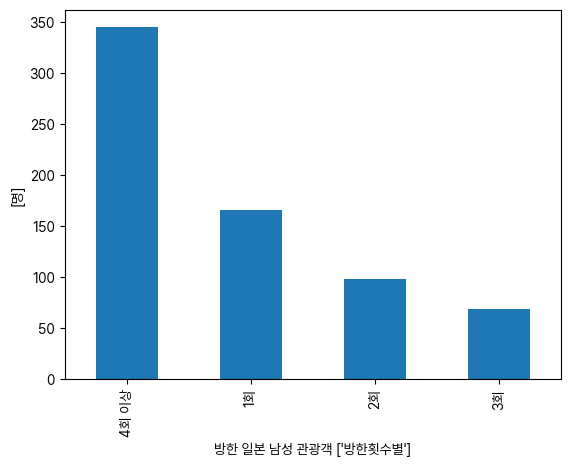

In [89]:
# 과거 방문 경험이 좋았으면 재여행인데
# 남자들은 방운 횟수가 어떻게 되는지?

mans_travel_df.loc[(mans_travel_df['D_NUM'] != -1), 'D_NUM'].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"방한 일본 남성 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'D_NUM', '항목명'].head(1).values}"
)

<Axes: xlabel="방한 일본 남성 관광객 ['방한목적별']", ylabel='[명]'>

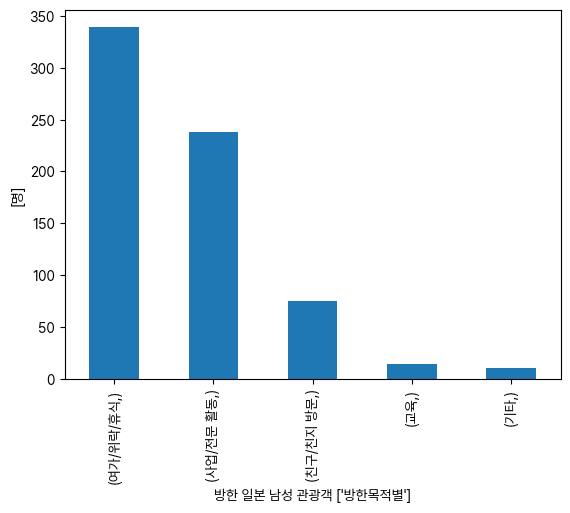

In [96]:
# 방한목적별
mans_travel_df.loc[mans_travel_df['D_MOK'] != -1, ['D_MOK']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=f"방한 일본 남성 관광객 {columns_value_df.loc[columns_value_df['변수명'] == 'D_MOK', '항목명'].head(1).values}"
)

In [ ]:
print(mans_travel_df.loc[mans_travel_df['D_MOK'] == '사업/전문 활동', 'Q1_1a1'].unique()) # [-1.0] - 사업/전문 활동을 목적으로 온 남성들은 관심 계기 1순위에 무응답

In [11]:
pd.reset_option('display.max_columns')      # 설정 초기화